# <center>Image Recognition with ANN and CNN using CIFAR-10 Dataset</center>

<p>This notebook explores the task of image recognition using the CIFAR-10 dataset. It includes the implementation of both Artificial Neural Network (ANN) and Convolutional Neural Network (CNN) models for image classification. The models are trained, evaluated, and used to make predictions on the dataset, providing insights into their performance for image recognition tasks.</p>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns

- Loading the CIFAR-10 dataset and examining its dimensions


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

- Preprocessing the dataset by reshaping and normalizing the pixel values


In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [8]:
y_test = y_test.reshape(-1,)

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

- Visualizing sample images from the dataset with their corresponding labels


In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

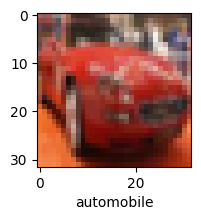

In [11]:
plot_sample(X_train, y_train, 5)

In [12]:
X_train = X_train / 255.0 
X_test = X_test / 255.0

- Training an Artificial Neural Network (ANN) model for image classification and evaluating its performance using a classification report and a confusion matrix


In [13]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)), 
    layers.Dense(3000, activation = 'relu'), 
    layers.Dense(1000, activation = 'relu'), 
    layers.Dense(10, activation ='softmax')
])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
ann.compile(optimizer = 'SGD', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 93s 59ms/step - accuracy: 0.3015 - loss: 1.9357
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 94s 60ms/step - accuracy: 0.4166 - loss: 1.6483
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.4554 - loss: 1.5416
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 136s 56ms/step - accuracy: 0.4761 - loss: 1.4927
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.4953 - loss: 1.4369


In [15]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('classification report: \n', classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
classification report: 
               precision    recall  f1-score   support

           0       0.65      0.46      0.54      1000
           1       0.41      0.79      0.54      1000
           2       0.47      0.17      0.25      1000
           3       0.40      0.26      0.32      1000
           4       0.33      0.57      0.42      1000
           5       0.50      0.26      0.35      1000
           6       0.57      0.46      0.51      1000
           7       0.46      0.63      0.53      1000
           8       0.61      0.61      0.61      1000
           9       0.54      0.52      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



- Training a Convolutional Neural Network (CNN) model for image classification and evaluating its performance


In [18]:

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"), layers.Dense(10, activation='softmax')
])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [19]:
cnn.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [26]:
cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6506 - loss: 0.9975
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6920 - loss: 0.8886
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7159 - loss: 0.8251
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7331 - loss: 0.7653
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7528 - loss: 0.7037


In [27]:
cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6946 - loss: 0.9043


[0.9199434518814087, 0.6866000294685364]

- Making predictions using the trained CNN model and visualizing sample images with their predicted classes


In [28]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


array([[4.1826386e-03, 6.5834541e-04, 2.6717817e-03, 6.4557403e-01,
        3.2155894e-04, 2.2175962e-02, 2.3122046e-03, 3.3308609e-04,
        3.0516809e-01, 1.6602376e-02],
       [9.5484231e-04, 8.0079913e-02, 8.9362047e-06, 1.4982820e-07,
        4.3347939e-07, 2.4523160e-07, 2.4414639e-08, 3.5120021e-08,
        9.1757715e-01, 1.3782138e-03],
       [9.3137562e-02, 2.2985114e-01, 1.6079337e-03, 2.3273337e-03,
        1.8923417e-03, 8.9943595e-04, 6.7109388e-05, 4.8014149e-03,
        6.3043928e-01, 3.4976467e-02],
       [8.9868855e-01, 1.3277082e-02, 1.3848759e-02, 2.2743933e-03,
        1.1074776e-03, 5.2294658e-05, 6.2688501e-05, 1.3783945e-04,
        7.0049509e-02, 5.0128181e-04],
       [2.6013043e-07, 6.0649204e-06, 4.3088123e-03, 2.7802141e-02,
        9.0962684e-01, 4.9582776e-03, 5.3262029e-02, 2.9904088e-06,
        3.2035186e-05, 4.9626431e-07]], dtype=float32)

In [29]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [30]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

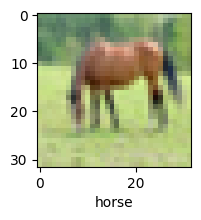

In [31]:
plot_sample(X_test, y_test, 60)

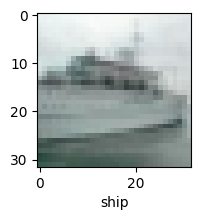

In [32]:
plot_sample(X_test, y_test, 80)

In [33]:
classes[y_classes[60]]

'horse'